In [26]:
import os
import cv2
import numpy as np
import mediapipe as mp
from keras.utils import np_utils
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [29]:
train_ds_path = r"F:\Artificial Intelligence\Deep Learning\Facial Expression Recognition - 2.2 End Project\datasets\dataset-02\train"
val_ds_path = r"F:\Artificial Intelligence\Deep Learning\Facial Expression Recognition - 2.2 End Project\datasets\dataset-02\val"
label_map = {'angry': 0, 'contempt': 1, 'disgust': 2, 'fear': 3, 'happy': 4, 'neutral': 5, 'sad': 6, 'surprise': 7}

In [30]:
X_train = []
y_train = []
X_val = []
y_val = []

 
    label_dir_path = os.path.join(train_ds_path, label)
    label_img_names = os.listdir(label_dir_path)

    for name in label_img_names:
        label_img = cv2.imread(os.path.join(label_dir_path, name))
        label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2GRAY)
        label_img = cv2.resize(label_img, (48, 48))

        X_train.append(label_img)
        y_train.append(label_map[label])

for label in label_map.keys():
    label_dir_path = os.path.join(val_ds_path, label)
    label_img_names = os.listdir(label_dir_path)

    for name in label_img_names:    
        label_img = cv2.imread(os.path.join(label_dir_path, name))
        label_img = cv2.cvtColor(label_img, cv2.COLOR_BGR2GRAY)
        label_img = cv2.resize(label_img, (48, 48))

        X_val.append(label_img)
        y_val.append(label_map[label])

X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(32547, 48, 48) (8146, 48, 48)
(32547,) (8146,)


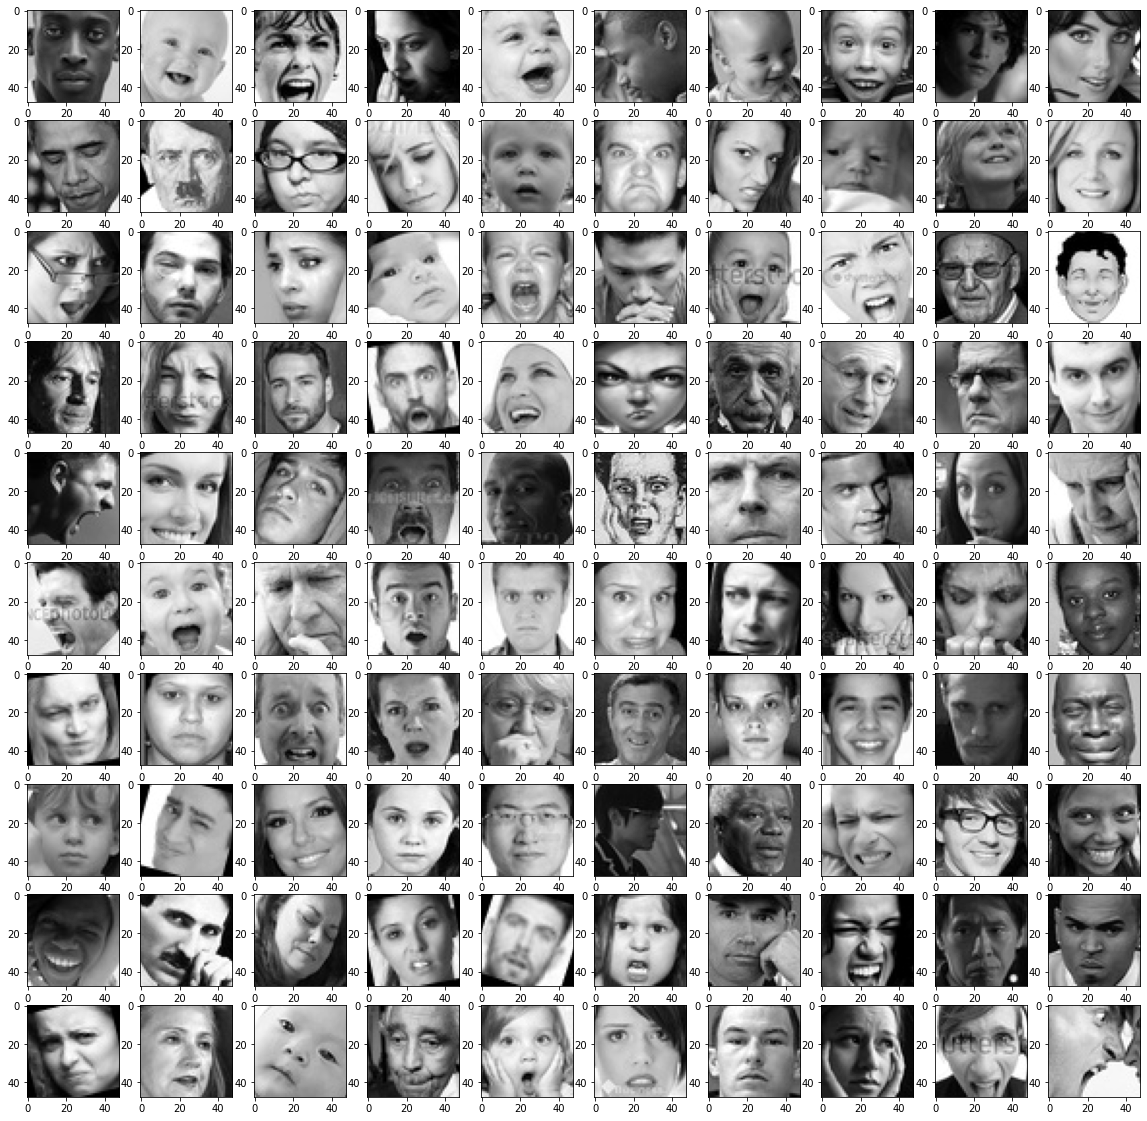

In [31]:
shuffled_data = shuffle(X_train[:])
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(48, 48, 1), cmap='gray')
plt.show()

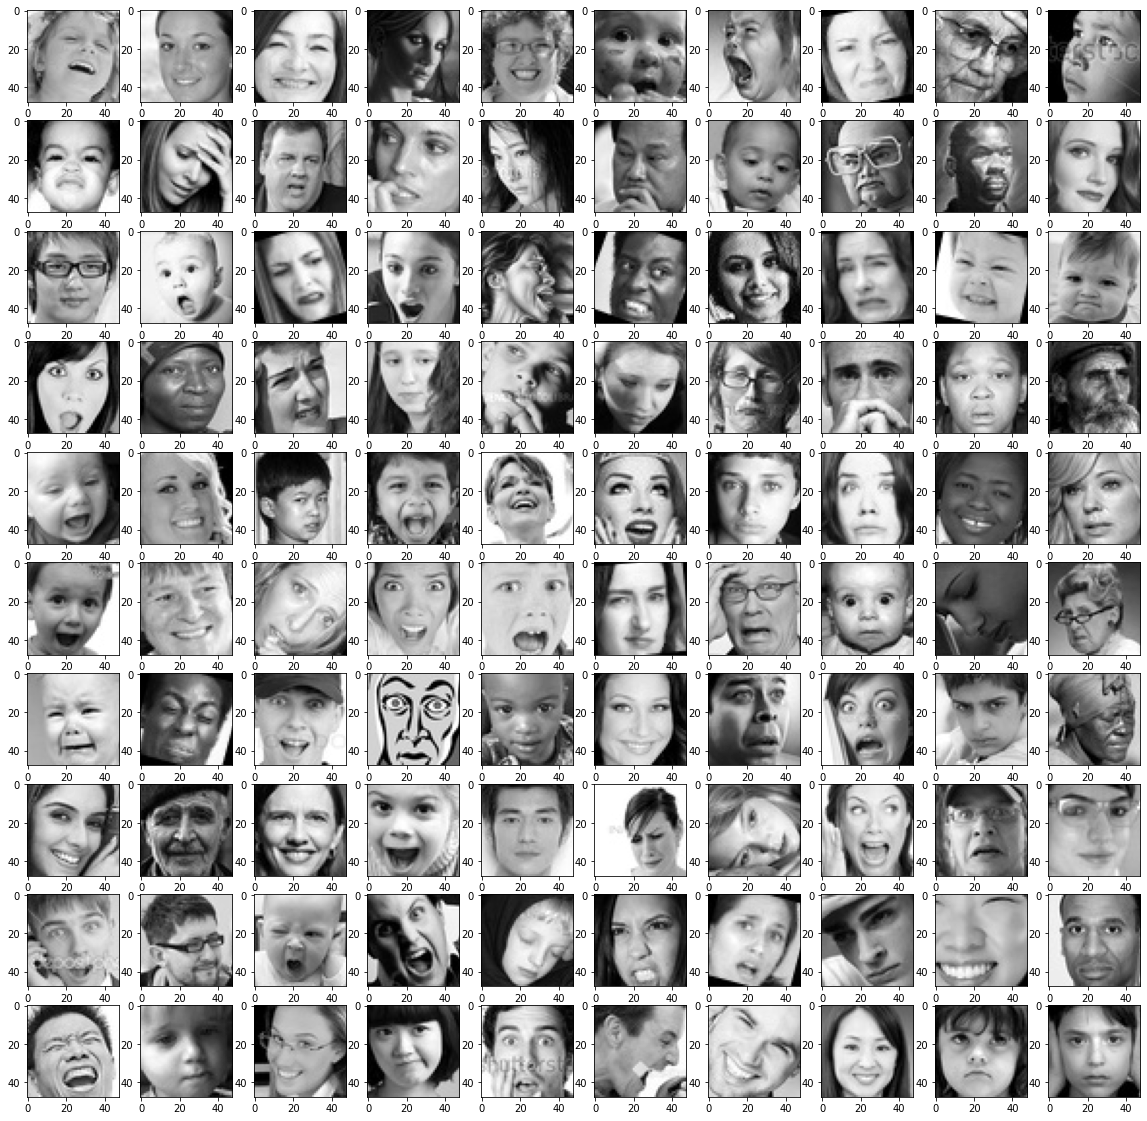

In [32]:
shuffled_data = shuffle(X_val[:])
rows, cols = 10, 10

plt.figure(figsize=(20, 20))

for i in range(rows * cols):
  plt.subplot(cols, rows, i+1)
  plt.imshow(shuffled_data[i].reshape(48, 48, 1), cmap='gray')
plt.show()

In [34]:
train_label_count = []

for i in range(len(label_map)):
    train_label_count.append(np.sum(y_train == i))
train_label_count

[3946, 2077, 2261, 4087, 7179, 4949, 4857, 3191]

In [35]:
val_label_count = []

for i in range(len(label_map)):
    val_label_count.append(np.sum(y_val == i))
val_label_count

[990, 520, 571, 1025, 1796, 1231, 1214, 799]

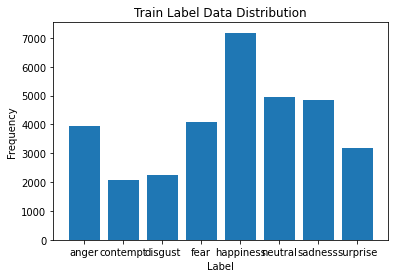

In [37]:
pos = range(len(train_label_count))

plt.bar(pos, train_label_count)
plt.xticks(pos, list(label_map.keys()))
plt.title('Train Label Data Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

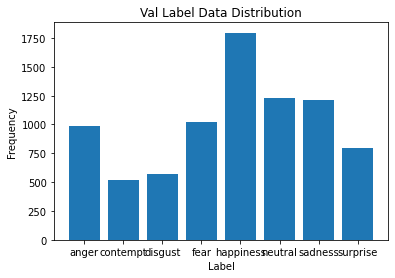

In [38]:
pos = range(len(val_label_count))

plt.bar(pos, val_label_count)
plt.xticks(pos, list(label_map.keys()))
plt.title('Val Label Data Distribution')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

In [39]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [40]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1))

In [41]:
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)

In [42]:
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(32547, 48, 48, 1) (8146, 48, 48, 1)
(32547, 8) (8146, 8)


In [ ]:
np.save("../numpy/X_train.npy", X_train)
np.save("../numpy/X_val.npy", X_val)
np.save("../numpy/y_train.npy", y_train)
np.save("../numpy/y_val.npy", y_val)